# Logistic regression and gradient descent implementation

In [1]:
import numpy as np
import math
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#logistic function 
#x: data inputs
#lamda: weights or coeficients
def logistic_f(x,lamda):
    row,col=np.shape(x)
    extra_col=np.transpose(np.ones(row))
    x= np.c_[extra_col,x]
    yhat=np.dot(x,lamda)
    prob=[]
    for i in range(len(yhat)):
        prob.append(1/(1+math.exp(-yhat[i])))
    return prob
    
    
#objective function
def log_loss(x,lamda,y):
    #y: labels
    F=logistic_f(x,lamda)
    loss=0
    for i in range(len(y)):
        l=math.log(y[i]*F[i]+(1-y[i])*(1-F[i]))
        loss=loss+l
    return -loss
    

In [4]:
# pre-step function to calculate gradients for each weight=lamda
def derivate(x,lamda,y,i):
    #i: index of each weight 
    #derivative at each weight is the sum of the derivatives for all data points at the given weight
    row,col=np.shape(x)
    extra_col=np.transpose(np.ones(row))
    x_tilda=np.c_[extra_col,x]
    F=logistic_f(x,lamda)
    derivate=0
    for n in range(row):
        numerator=(y[n]-(1-y[n]))*(F[n]*(1-F[n])*(x_tilda[n,i]))
        denominator=y[n]*F[n]+(1-y[n])*(1-F[n])
        derivate=derivate+(numerator/denominator)
    return(-derivate)


#function to calculate gradients for each weight
def gradient(x,lamda,y):
    grad_temp=[]
    for i in range(len(lamda)):
        grad_temp.append(derivate(x,lamda,y,i))
    return (grad_temp)
#function that optimize the weigths= lamda
def optimization(x,lamda,y,T,eta):
    #T: epochs
    #eta:learning rate
    for i in range(T):
        grad=np.array(gradient(x,lamda,y))
        lamda=np.array(lamda)-(eta*grad)
    return lamda
        
    

### Applying logistic regression and gradient descent to auto data set

In [7]:
# Loading the auto dataset and creating a new variable 'high'
Auto= pd.read_csv('auto.data.txt', delim_whitespace=True, na_values='?')
Auto.dropna(inplace=True)
#creating a new column for high
Auto['high'] = np.where(Auto['mpg']>=23,1,0)

#creating dummy variables for origin
Auto['origin2'] = np.where(Auto['origin']==2,1,0)
Auto['origin3'] = np.where(Auto['origin']==3,1,0)


In [8]:
#normalising the features
scaler= StandardScaler()
data_scaled=Auto.loc[:,('horsepower','weight','year','origin2','origin3')]
data_scaled=scaler.fit_transform(data_scaled)


In [9]:
#naming my x and y variables and initializing parameters
y=Auto.loc[:,'high'].to_numpy()
x=data_scaled
init_lamda=np.transpose(np.array([0.1,0.2,0,1,-1,0.1]))
T=100
eta=0.0001
lamda=optimization(x,init_lamda,y,T,eta)



In [10]:
#splitting the dataset randomly into training an test set. 
#80% for training
data=np.c_[x,y]
x_train,x_test,y_train,y_test=train_test_split(data[:,:5],data[:,-1],test_size=0.2,random_state=228)


In [11]:
#defining a prediction function for predicting the labels 
def predict(x,lamda):
    prob=logistic_f(x,lamda)
    y_pred=[]
    for p in range(len(prob)):
        if prob[p]>0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

#defining error rate function
def error_rate(y,y_pred):
    error_rate=0
    for i in range(len(y_test)):
        error=(y_test[i]-y_pred[i])**2
        error_rate+=error
    return (error_rate/len(y_test))
        


In [20]:
#trying different learning rates
#finding the error rate of the trained model on the test set
np.random.seed(228)
eta=0.00001
etas=[.1,.01,.001,.0001,.00001,.000001,.0000001,.00000001,.000000001,.0000000001]
T=100
error_rate_train=[]
error_rate_test=[]

for i in range(len(etas)):
    row,col=np.shape(x_train)
    lamda_init=np.random.uniform(low=-.7,high=.71, size=col+1)
    lamda=optimization(x_train,lamda_init,y_train,T,etas[i])
    y_train_pred=predict(x_train,lamda)
    y_test_pred=predict(x_test,lamda)
    training_ER=error_rate(y_train,y_train_pred)
    test_ER=error_rate(y_test,y_test_pred)
    error_rate_train.append(training_ER)
    error_rate_test.append(test_ER)
    print('\n for eta: {} and T: {}'.format(etas[i],T))    
    print('Training Error Rate:\n {}'.format(training_ER))
    print('Test Error Rate:\n {}'.format(test_ER))

    
    
    
    


 for eta: 0.1 and T: 100
Training Error Rate:
 0.5189873417721519
Test Error Rate:
 0.08860759493670886

 for eta: 0.01 and T: 100
Training Error Rate:
 0.4810126582278481
Test Error Rate:
 0.06329113924050633

 for eta: 0.001 and T: 100
Training Error Rate:
 0.46835443037974683
Test Error Rate:
 0.05063291139240506

 for eta: 0.0001 and T: 100
Training Error Rate:
 0.4936708860759494
Test Error Rate:
 0.08860759493670886

 for eta: 1e-05 and T: 100
Training Error Rate:
 0.43037974683544306
Test Error Rate:
 0.21518987341772153

 for eta: 1e-06 and T: 100
Training Error Rate:
 0.5316455696202531
Test Error Rate:
 0.189873417721519

 for eta: 1e-07 and T: 100
Training Error Rate:
 0.46835443037974683
Test Error Rate:
 0.43037974683544306

 for eta: 1e-08 and T: 100
Training Error Rate:
 0.4936708860759494
Test Error Rate:
 0.5316455696202531

 for eta: 1e-09 and T: 100
Training Error Rate:
 0.43037974683544306
Test Error Rate:
 0.3037974683544304

 for eta: 1e-10 and T: 100
Training Er

In [13]:
#choosing learning rate that produces the smallest test error rate
eta=etas[error_rate_test.index(min(error_rate_test))]
eta

0.001

In [14]:
#generating a table to compare test and train error rates
T=[]
t=100
for i in range(len(etas)):
    T.append(t)
data_table=np.c_[np.array(error_rate_train),np.array(error_rate_test)]
data_table=pd.DataFrame(data=data_table,columns=['Training Error Rate','Test Error Rate'])

data_table['T']=T
data_table['Eta']=etas

data_table

,Training Error Rate,Test Error Rate,T,Eta
0,0.518987,0.088608,100,1.000000e-01
1,0.481013,0.063291,100,1.000000e-02
2,0.468354,0.050633,100,1.000000e-03
3,0.493671,0.088608,100,1.000000e-04
4,0.430380,0.215190,100,1.000000e-05
5,0.531646,0.189873,100,1.000000e-06
6,0.468354,0.430380,100,1.000000e-07
7,0.493671,0.531646,100,1.000000e-08
8,0.430380,0.303797,100,1.000000e-09
9,0.582278,0.784810,100,1.000000e-10


Traying different stopping criterias


In [15]:

np.random.seed(228)
eta=eta
lamda=np.random.uniform(low=-.7,high=.71, size=col+1)
num_iter=0

while True:
    grad=np.array(gradient(x_train,lamda,y_train))
    lamda=np.array(lamda)-(eta*grad)
    if num_iter%10==0:
        initial_value=log_loss(x_train,lamda,y_train)
       
       
    else:
        if num_iter%10==9:
            final_value=log_loss(x_train,lamda,y_train)
            if ((initial_value-final_value)/initial_value)*100<=1:
                lamda_opt=lamda
                print('No of iteration when objective change more than 1%:\n {}'.format(num_iter))
                print('Values of lamdas after {} iterations:\n {}'.format(num_iter,lamda_opt))
                break
    
    num_iter=num_iter+1
 

    



No of iteration when objective change more than 1%:
 109
Values of lamdas after 109 iterations:
 [-0.45706198 -1.32031894 -1.80791477  1.02941585  0.44181584  0.58528332]


In [16]:
#calculating error rate with optimal learning rate
lamda=lamda_opt
y_train_pred=predict(x_train,lamda)
y_test_pred=predict(x_test,lamda)
training_ER=error_rate(y_train,y_train_pred)
test_ER=error_rate(y_test,y_test_pred)

print('Training Error Rate:\n {}'.format(training_ER))
print('Test Error Rate:\n {}'.format(test_ER))


Training Error Rate:
 0.46835443037974683
Test Error Rate:
 0.05063291139240506


plotting the test error rate for 100 different models 

In [22]:
np.random.seed(228)
eta
T=100
test_error_rate=[]
for i in range(T):
    lamda=np.random.uniform(low=-.7,high=.71, size=col+1)
    lamda_opt=optimization(x_train,lamda,y_train,T,eta)
    y_test_pred=predict(x_test,lamda_opt)
    test_error_rate.append(error_rate(y_test,y_test_pred))

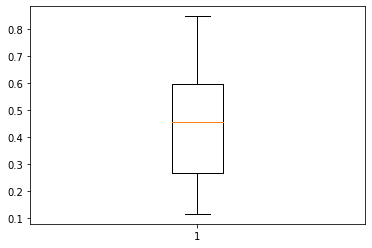

In [23]:
plt.boxplot(test_error_rate)
plt.show()